print the first 4 rows from the dataset
----------------------------------------
sepal length	 sepal width
5.1		 3.5
4.9		 3.0
4.7		 3.2
4.6		 3.1


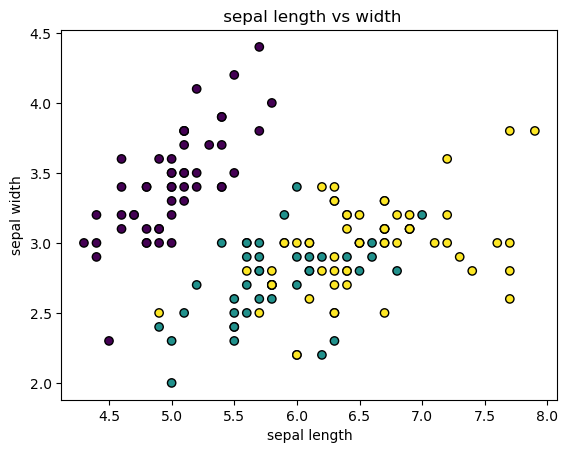

first four value of training set
-----------------------------
sepal length	 sepal width
6.4		 3.1 
5.4		 3.0 
5.2		 3.5 
6.1		 3.0 
first four value of teating set
-----------------------------
sepal length	 sepal width
5.8		 2.8 
6.0		 2.2 
5.5		 4.2 
7.3		 2.9 

 The accuracy is: 0.7333333333333333
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.62      0.67        13
           2       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.76      0.73      0.74        30



<Figure size 640x480 with 0 Axes>

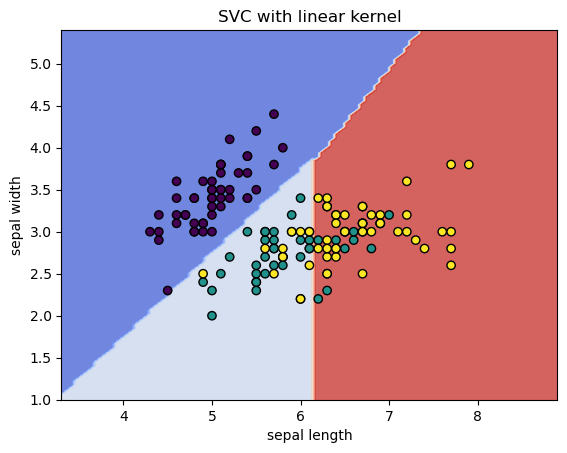

In [3]:
# Implement SVM to classify the type of iris flower based on its sepal length and width using the iris dataset. 

import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# loading the dataset
iris= datasets.load_iris()
X= iris.data[:, :2]       # taking only sepal length and sepal width
y= iris.target

#print the first 4 rows of the dataset
print('print the first 4 rows from the dataset')
print('----------------------------------------')
print('sepal length\t sepal width')
for i in range(4):
    print(f"{X[i, 0]}\t\t {X[i, 1]}")

#VISUALIZE THE DATA
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k' )
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title(' sepal length vs width')
plt.show()

#Splitting into training(80%) and testing(20%)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 0)

#print few of the training and testing set
print('first four value of training set')
print('-----------------------------')
print('sepal length\t sepal width')
for i in range(4):
    print(f"{X_train[i, 0]}\t\t {X_train[i, 1]} ")
    
print('first four value of teating set')
print('-----------------------------')
print('sepal length\t sepal width')
for i in range(4):
    print(f"{X_test[i, 0]}\t\t {X_test[i, 1]} ")

    
#initializing and training the SVM model
svm_model= SVC(kernel= 'linear', C=1)
svm_model.fit(X_train, y_train)

#Testing the model
y_prediction= svm_model.predict(X_test)
Accuracy= accuracy_score(y_test, y_prediction)
print('\n The accuracy is:', Accuracy)
print('Classification report')
print(classification_report(y_test, y_prediction))


# Visualizing the decision boundary for linear kernel 
plt.figure()
disp = DecisionBoundaryDisplay.from_estimator(
    svm_model,
    X_train,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('SVC with linear kernel')
plt.show()